# Introduction to high experimental energy physics with Pythia
    This tutorial is designed to give you a brief introduction to the Pythia event generator. Then after that we will see what the output of Pythia looks like and how to analyze it. Finally, we will compare simulation to what we see in the real world.

### Imports
This is how we tell python what packages we want to use. We will be using the following packages:
* [Pythia](http://home.thep.lu.se/~torbjorn/Pythia.html) - The event generator we will be using
* [matplotlib](https://matplotlib.org/) - A plotting package
* [numpy](http://www.numpy.org/) - A package for doing math with arrays
```python

In [1]:
import numpy as np # Import numpy
import matplotlib.pyplot as plt # Import matplotlib
import pythia8 # Import pythia8

## Initializing Pythia
Pythia is a particle physics event generator. It is a program that simulates particle collisions and decays. It is used to simulate the data that we expect to see in our detectors. The physics that Pythia simulates is based on the Standard Model of particle physics. The Standard Model is a theory that describes the fundamental particles and forces of nature. It is the most successful theory of particle physics to date. However, it is not a complete theory. It does not explain gravity or dark matter. It also does not explain why there is more matter than antimatter in the universe.


In [79]:
pythia = pythia8.Pythia() # Create Pythia object
# Set Pythia parameters
pythia.readString("Beams:eCM = 5020.") # center-of-mass energy = 5.02 TeV 
pythia.readString("HardQCD:all = on") # allow all hard QCD processes (quark/gluon scattering)
pythia.readString("Beams:idA =  2212") # set beam A to proton
pythia.readString("Beams:idB = 2212") # set beam B to proton
pythia.readString("Tune:pp = 14") # set the Pythia tune to 14 (google Pythia tune for more info)
pythia.readString("Main:numberOfEvents = 10000") # generate 10,000 events
pythia.readString("PhaseSpace:pTHatMin = 20.") # set minimum pT hard cut to 20 GeV
# Initialize Pythia
pythia.init()

True


 *------------------------------------------------------------------------------------* 
 |                                                                                    | 
 |  *------------------------------------------------------------------------------*  | 
 |  |                                                                              |  | 
 |  |                                                                              |  | 
 |  |   PPP   Y   Y  TTTTT  H   H  III    A      Welcome to the Lund Monte Carlo!  |  | 
 |  |   P  P   Y Y     T    H   H   I    A A     This is PYTHIA version 8.309      |  | 
 |  |   PPP     Y      T    HHHHH   I   AAAAA    Last date of change: 16 Feb 2023  |  | 
 |  |   P       Y      T    H   H   I   A   A                                      |  | 
 |  |   P       Y      T    H   H  III  A   A    Now is 30 Aug 2023 at 12:37:09    |  | 
 |  |                                                                              |  | 
 |  |   Program docu

# Exploring output of Pythia
The pythia object will fill an event when you call the next() method. The event is a list of particles. Each particle is a list of properties. The properties are:
* id - The particle's PDG ID
* status - The particle's status code
* mother1 - The index of the particle's first mother
* col - The particle's color
* acol - The particle's anticolor
* px - The particle's x momentum
* py - The particle's y momentum
* pz - The particle's z momentum
* e - The particle's energy
* m - The particle's mass
* pT - The particle's transverse momentum
* mT - The particle's transverse mass
* y - The particle's rapidity
* phi - The particle's azimuthal angle
* eta - The particle's pseudorapidity

and more. For a full list of properties see the [Pythia documentation](http://home.thep.lu.se/~torbjorn/pythia82html/ParticleProperties.html).

```python

In [164]:
# This function prints a summary of the event as a table
def PrintEvent(event, ncutoff):
    '''
    Prints multiplicity of final state particles in an event
    and their PDG code, name, energy, pseudorapidity, and azimuthal angle
    '''
    print("Total particles in event: %d" % event.size())
    print("---------------------------------------------------")
    print("PDG\tName\tE(GeV)\teta\tphi")
    print("---------------------------------------------------")
    counter = 0
    for particle in event:
        if particle.isFinal():
            if counter < ncutoff:
                print("%d\t%s\t%.3f\t%.3f\t%.3f" % (particle.id(), particle.name(), particle.e(), particle.eta(), particle.phi()))
                counter += 1

Lets look at the output of a pythia event. We will use the pythia object to generate a single event. Then we will loop over the particles in the event and print out their properties.

```python

In [166]:
pythia.next() # generate the next event        
PrintEvent(pythia.event, ncutoff=25) # print the event (only the first 100 particles)

Total particles in event: 147
---------------------------------------------------
PDG	Name	E(GeV)	eta	phi
---------------------------------------------------
-211	pi-	265.795	7.369	-0.415
321	K+	60.654	5.247	-2.978
-321	K-	30.339	4.786	2.980
211	pi+	2.537	3.078	0.537
-211	pi-	0.485	1.326	-1.572
211	pi+	0.734	0.364	1.148
211	pi+	0.364	1.874	-0.534
211	pi+	12.821	-3.259	-0.576
-211	pi-	29.994	-5.340	-1.737
321	K+	203.756	-7.188	2.789
-211	pi-	57.687	-5.996	1.380
211	pi+	236.609	-7.318	-1.497
2112	n0	330.699	-8.200	2.900
211	pi+	723.949	-8.687	-2.082
321	K+	1.483	2.039	1.161
2212	p+	20.552	3.727	-1.949
-2212	pbar-	73.843	4.643	0.313
211	pi+	91.950	5.895	-0.823
2112	n0	1439.686	8.129	-2.432
130	K_L0	1.620	1.830	-1.678
-211	pi-	0.672	0.791	1.148
211	pi+	0.438	-0.495	1.065
-211	pi-	0.907	-1.031	-1.908
-211	pi-	1.058	-0.742	1.158
321	K+	12.973	-3.552	2.644


In this table we see the following quantities:
1. id - The particle's PDG ID (see [here](http://pdg.lbl.gov/2007/reviews/montecarlorpp.pdf) for a list of PDG IDs)
> Heres a couple common ones that you might see:
    
* 22 - Photon (gamma)
* 11 - Electron (e-)
* $\pm$ 211 - Pion ($\pi^\pm$)
* $\pm$ 321 - Kaon ($K^\pm$)
* $\pm$ 2212 - Proton ($p^\pm$)

2. Name - The particle's name
3. E - The particle's energy (in GeV)
4. phi - The particle's azimuthal angle (in radians)
5. eta - The particle's pseudorapidity

## Plotting particle four-momentum
Now lets look at the four-momentum of the particles for a bunch of events. We will use the pythia object to generate 100 events. Then we will loop over the particles in each event and plot thier four-momentum (px, py, pz, E). The histograms will display the frequency of measuring a particle with a given four-momentum. This is called the particle's momentum spectrum. The x-axis with be a component of the four-momentum and the y-axis will be the frequency of measuring that component ($\frac{dN}{dp}$).

```python

Here are functions that will simulate nevents and return the four-momentum of the final state particles in each event. The final state particles are the particles that are not decayed. They are the particles that we would see in our detector. Then we will plot the four-momentum of the final state particles.

```python

In [65]:
def GetParticles(nevents=100):
    # Get the particles from Pythia for nevents
    particle_momentum = []
    for i in range(nevents):
        pythia.next()
        for particle in pythia.event:
            if particle.isFinal(): # only consider final state particles
                particle_momentum.append([particle.px(), particle.py(), particle.pz(), particle.e()])
    particle_momentum = np.array(particle_momentum) # convert to numpy array
    return particle_momentum

def PlotFourMomentum(particles):
    # Plot the four-momentum distributions
    fig,axs = plt.subplots(1,4,figsize=(20,5), constrained_layout=True)
    axs[0].hist(particles[:,0],bins=100, range=(-10,10), histtype='step', label='px')
    axs[0].set_xlabel(r'$p_x$ (GeV/c)', fontsize=16)
    axs[0].set_yscale('log')
    axs[0].set_ylabel(r'$\frac{dN}{dp_x}$ ($GeV^{-1}$)', fontsize=16)
    axs[1].hist(particles[:,1],bins=100, range=(-10,10), histtype='step', label='py')
    axs[1].set_xlabel(r'$p_y$ (GeV/c)', fontsize=16)
    axs[1].set_yscale('log')
    axs[1].set_ylabel(r'$\frac{dN}{dp_y}$ ($GeV^{-1}$)', fontsize=16)
    axs[2].hist(particles[:,2],bins=100, range=(0,10), histtype='step', label='pz')
    axs[2].set_yscale('log')
    
    axs[2].set_xlabel(r'$p_z$ (GeV/c)', fontsize=16)
    axs[2].set_ylabel(r'$\frac{dN}{dp_z}$ ($GeV^{-1}$)', fontsize=16)
    axs[3].hist(particles[:,3],bins=100, range=(0,10), histtype='step', label='E')
    axs[3].set_xlabel(r'$E$ (GeV/$c^2$)', fontsize=16)
    axs[3].set_yscale('log')
    axs[3].set_ylabel(r'$\frac{dN}{dE}$ ($GeV^{-1}$)', fontsize=16)
    plt.show()

## Observing four-momentum of final state particles
A couple things to notice from these plots:
1. They are log scaled. This is because the energy and px distributions are power law distributions. This means that the frequency of measuring a particle with a given energy or px is proportional to the energy or px to some power. This is why the y-axis is log scaled. It allows us to see the high energy particles.
2. The energy and px distributions are symmetric. This is an example of momentum conservation. All the incoming momentum is along the z-axis. So the total px and py of the final state particles should be zero. This is why the energy and px distributions are symmetric.


 Pythia::next(): 1000 events have been generated 


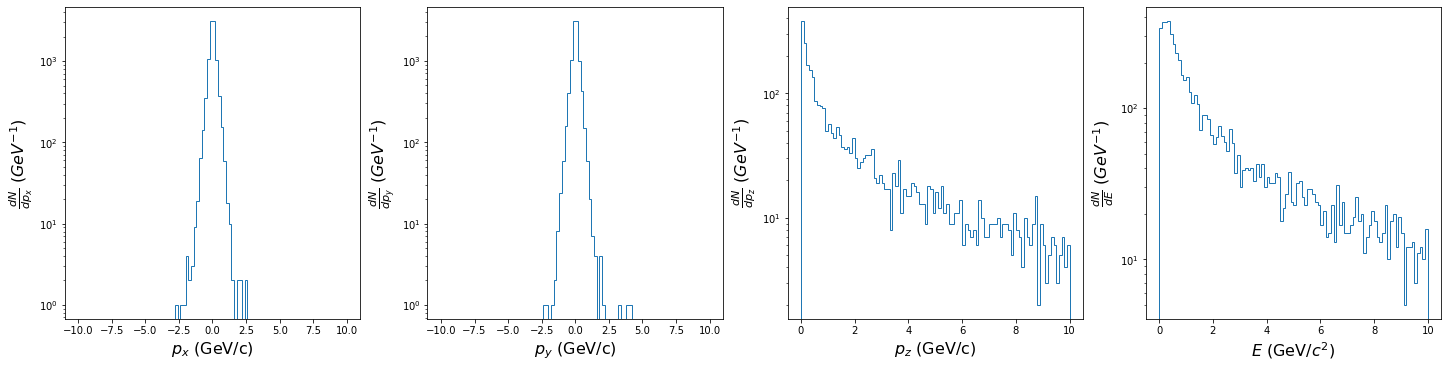

In [47]:
particle_momentum = GetParticles(nevents=100) # get 100 events
PlotFourMomentum(particle_momentum) # plot the four-momentum distributions

# _Exercise 1_
Demonstrate momentum conservation by plotting the total px and py of the final state particles.
* First the total px and py of all the final state particles in our events. (Hint: use the numpy sum function np.sum())
* Then plot total px and py of the final state particles in each event.

The final plots should look something like this:

![alt text][pxpy]

[pxpy]:../figures/total_px_py.png "Sum of px and py for 100 events. Notice it should be zero."

```python

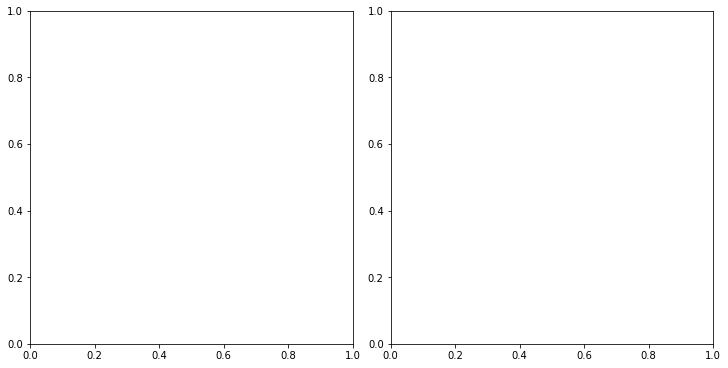

In [56]:
def GetTotalPxPy(nevents=100):
    # Get the particles from Pythia for nevents
    particle_px_and_py_sums = [] # initialize list to store px and py sums
    '''
    loop over nevents
    initialize event px and py lists
    get the particles
    add px and py to event lists
    sum px and py lists for each event
    append to px and py sums list (particle_px_and_py_sums)
    return particle_px_and_py_sums
    '''
    return particle_px_and_py_sums
 
 
# Get the particles from Pythia for nevents
particle_px_and_py_sums = GetTotalPxPy(nevents=100) # get 100 events 

# Plot the total px and py distributions
fig,axs = plt.subplots(1,2,figsize=(10,5), constrained_layout=True)
'''
plot the total px and py distributions for all events
'''
plt.show()

# 2. Center of mass coordinates
In high energy physics most of our particles we detect are moving near the speed of light (**c**). This means that the lab frame and the particles frame are not the same. We need to transform the particles coordinates into something that we can measure in the lab.

![alt text][alicedetector]

[alicedetector]:../figures/AliceDetector.jpg "Picture of ALICE detector. The detector is cylindrically symmetric. The z axis is along the beam line. The x axis is horizontal and the y axis is vertical. The origin is at the center of the detector."

Our detectors are typically cylindrically symmetric. The z axis is along the beam line. The x axis is horizontal and the y axis is vertical. The origin is at the center of the detector. Therefore it is convenient to transform the particles coordinates into cylindrical coordinates($p_T$, $\phi$, $\eta$, $m_T$). The transverse momentum ($p_T$) is the momentum of the particle in the x-y plane. The azimuthal angle ($\phi$) is the angle in the x-y plane. The pseudorapidity ($\eta$) is related to the angle between the particle's momentum and the z axis. The transverse mass ($m_T$) is the mass of the particle in the x-y plane. This is how they are defined:

$$p_T = \sqrt{p_x^2 + p_y^2}$$
$$\phi = \arctan{\frac{p_y}{p_x}}$$
$$\eta = \frac{1}{2}\ln{\frac{|\vec{p}| + p_z}{|\vec{p}| - p_z}}$$
$$m_T = \sqrt{m^2 + p_T^2}$$

Here is some more information about [pseudorapidity](https://en.wikipedia.org/wiki/Pseudorapidity) and a visualization of $\eta$ and $\phi$:

![alt text][etaphi]

[etaphi]:../figures/etaphi.jpg "Picture of eta and phi. The z axis is along the beam line. The x axis is horizontal and the y axis is vertical. The origin is at the center of the detector."


# _Exercise 2_
Plot eta, phi and pT for the particles in the event.

* hint: $|\vec{p}|$ = $\sqrt{p_x^2 + p_y^2 + p_z^2}$
* hint: use np.log for the pseudorapidity
* hint: use np.arctan2 for the azimuthal angle
* hint: use np.sqrt for square root
* hint: mass is found from the product of four-momentum with itself (m = np.sqrt($p^{\mu}p_{\mu}$)). For more information see [here](https://en.wikipedia.org/wiki/Four-momentum)

The following plots are examples of what you should get:

![alt text][etaphipt]

[etaphipt]:../figures/transformation.png "Plot of eta, phi and pT for 100 events."

```python

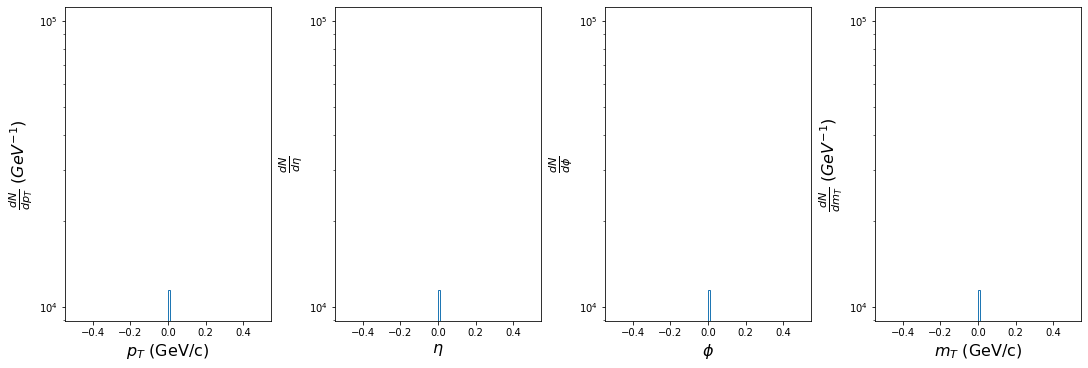

In [67]:
def TransformToLabFrame(particles):
    '''
    transform the four-momenta of the particles to the lab frame
    hint: $|\vec{p}|$ = $\sqrt{p_x^2 + p_y^2 + p_z^2}$
    hint: use np.log for the pseudorapidity
    '''
    particles_transformed = np.zeros(particles.shape)
    px = particles[:,0]
    py = particles[:,1]
    pz = particles[:,2]
    e = particles[:,3]
    
    # mass is product of four-momentum with itself 
    mass = np.zeros(particles.shape[0]) # initialize mass array
    for i in range(particles.shape[0]):
        pdotp = e[i]**2 - px[i]**2 - py[i]**2 - pz[i]**2
        # need to be careful with zero mass particles (will mess up sqrt) 
        if pdotp > 0:
            mass[i] = np.sqrt(pdotp)
        else:
            mass[i] = 0 # photon, gluon, etc.
    
    # magnitude of three-momentum
    mag_p = np.sqrt(px**2 + py**2 + pz**2)
   
    # calculate pt, eta, phi, and mt
            
    pt = 0 
    eta = 0
    phi = 0
    mt = 0
    # fill the transformed particles array
    particles_transformed[:,0] = pt
    particles_transformed[:,1] = eta
    particles_transformed[:,2] = phi
    particles_transformed[:,3] = mt
    return particles_transformed




# get four-momenta of particles
particle_momentum = GetParticles(nevents=100) # get 100 events
# transform to lab frame
particle_momentum = TransformToLabFrame(particle_momentum)

# Plot the momentum distributions of the particles (pT, eta, phi, mT)
fig,axs = plt.subplots(1,4,figsize=(15,5), constrained_layout=True)
xlabels = [r'$p_T$ (GeV/c)', r'$\eta$', r'$\phi$', r'$m_T$ (GeV/c)']
ylabels = [r'$\frac{dN}{dp_T}$ ($GeV^{-1}$)', r'$\frac{dN}{d\eta}$', r'$\frac{dN}{d\phi}$', r'$\frac{dN}{dm_T}$ ($GeV^{-1}$)']
for i in range(4):
    axs[i].hist(particle_momentum[:,i],bins=100, histtype='step')
    axs[i].set_xlabel(xlabels[i], fontsize=16)
    axs[i].set_ylabel(ylabels[i], fontsize=16)
    axs[i].set_yscale('log')
plt.show()

# 3 Simulation vs. Real Data
Unfortunately, we can't measure the four-momentum of the particles in our detector. We can only measure the energy and momentum of the particles. We can measure the energy of the particles by measuring the energy deposited in our calorimeters. We can measure the momentum of the particles by measuring the curvature of the particle's track in our tracking detectors. 

Our detectors aren't perfect and to demonstrate this we can compare the event picture from a simulation and then detector point of veiw.

The following function shows whats called an event display. It plots the tracks of the particles in the event. The tracks are colored by the particle's PDG ID. The tracks are plotted in the x-y plane. The z axis is along the beam line. The x axis is horizontal and the y axis is vertical. The origin is at the center of the detector.

```python

In [215]:
def EventDisplay(event, magneticFeild=False, addDetector=False, addTracking=False, addCalo=False, measure=False, view_angle=(90,90)):
    '''
    Takes particle pseudorapidity and azimuthal angle, pz, and energy and plots
    in a 3D cylindrical detector display
    '''
    from mpl_toolkits.mplot3d import Axes3D
    from matplotlib import cm
    
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(view_angle[0], view_angle[1])
    tracking_radii = [0.4, 0.7]
    calo_radii = [1.1, 1.2, 1.3, 1.4]
    detector_radii = [1.0]
       # plot detector

    # ax.set_title('Pythia 8 Event Display')
    if not measure:
        if addDetector:
            Dt = 20
        else:
            Dt = 10
        for particle in event:
            # only plot final state particles
            if not particle.isFinal():
                continue
            
            # calculate particle trajectory
            vtx = np.array([particle.xProd(), particle.yProd(), particle.zProd()])
            r = np.zeros([Dt,3]) # array to store particle positions
            r[0] = vtx # set initial position to production vertex
            p = np.array([particle.px(), particle.py(), particle.pz()]) # momentum
            dt = 0.1 # time step
            if magneticFeild:
                B = np.array([0,0,1.5]) # magnetic field  
                q = particle.charge() # charge         
                for i in range(1,Dt):
                    F = np.cross(p,B)*q # force
                    p = p + F*dt # update momentum
                    vtx = vtx + p*dt # update position
                    r[i,:] = vtx # store position
            else:
                for i in range(1,Dt):
                    vtx = vtx + p*dt # update position
                    r[i,:] = vtx # store position
            r = r[np.sqrt(r[:,0]**2 + r[:,1]**2 + r[:,2]**2) < 1.5]
            
            # set color based on particle type
            if np.abs(particle.id()) == 211: # pion
                color = "red" 
            elif np.abs(particle.id()) == 111: # neutral pion
                color = "red"
            elif np.abs(particle.id()) == 321: # kaon
                color = "green"
            elif np.abs(particle.id()) == 2212: # proton and antiproton
                color = "blue"
            else: # other
                color = "black"
    
            ax.plot(r[:,0], r[:,1], r[:,2], color=color, alpha=1.0, linewidth=particle.pT()/1.5)            
    
    if measure:
        Dt = 100
        dt = 0.1
        # get hits in tracking detectors
        tracking_hits = []
        calo_deposits = []
        for particle in event:
            if not particle.isFinal():
                continue
            vtx = np.array([particle.xProd(), particle.yProd(), particle.zProd()])
            r = np.zeros([Dt,3]) # array to store particle positions
            r[0] = vtx # set initial position to production vertex
            p = np.array([particle.px(), particle.py(), particle.pz()]) # momentum
            B = np.array([0,0,1.5]) # magnetic field
            q = particle.charge() # charge
            for i in range(1,Dt):
                F = np.cross(p,B)*q
                p = p + F*dt
                vtx = vtx + p*dt
                r[i,:] = vtx
            
            # get hits in tracking detectors
            for i in range(len(tracking_radii)):
                for j in range(1,Dt):
                    if np.sqrt(r[j,0]**2 + r[j,1]**2) > tracking_radii[i]:
                        if np.sqrt(r[j-1,0]**2 + r[j-1,1]**2) < tracking_radii[i]:
                            tracking_hits.append([r[j,0], r[j,1], r[j,2]])
            
            # get deposits in calorimeter
            for i in range(len(calo_radii)):
                for j in range(1,Dt):
                    if np.sqrt(r[j,0]**2 + r[j,1]**2) > calo_radii[i]:
                        if np.sqrt(r[j-1,0]**2 + r[j-1,1]**2) < calo_radii[i]:
                            calo_deposits.append([r[j,0], r[j,1], r[j,2], particle.e()])
            
        calo_deposits = np.array(calo_deposits)    
        tracking_hits = np.array(tracking_hits)
        ax.scatter(tracking_hits[:,0], tracking_hits[:,1], tracking_hits[:,2], color='red', alpha=0.5, s=10)
        #plot cubes for calorimeter deposits
        for i in range(len(calo_deposits)):
            ax.plot([calo_deposits[i,0],calo_deposits[i,0]],[calo_deposits[i,1],calo_deposits[i,1]],[calo_deposits[i,2],calo_deposits[i,2]+calo_deposits[i,3]], color='green', alpha=0.5, linewidth=2)
        
    if addDetector:
        x = np.linspace(-1.0, 1.0, 100)
        z = np.linspace(-1.0, 1.0, 100)
        Xc, Zc = np.meshgrid(x, z)
        Yc = np.sqrt(1-Xc**2)
        ax.plot_surface(Xc, Yc, Zc, alpha=0.8, color='blue')
        ax.plot_surface(Xc, -Yc, Zc, alpha=0.8, color='blue')
    
    # plot tracking
    if addTracking:
        x = np.linspace(-0.4, 0.4, 100)
        z = np.linspace(-0.4, 0.4, 100)
        Xc, Zc = np.meshgrid(x, z)
        Yc = np.sqrt(0.4**2-Xc**2)
        ax.plot_surface(Xc, Yc, Zc, alpha=0.8, color='red', linewidth=0.2)
        ax.plot_surface(Xc, -Yc, Zc, alpha=0.8, color='red', linewidth=0.2)
        x2 = np.linspace(-0.7, 0.7, 100)
        z2 = np.linspace(-0.7, 0.7, 100)
        Xc2, Zc2 = np.meshgrid(x2, z2)
        Yc2 = np.sqrt(0.7**2-Xc2**2)
        ax.plot_surface(Xc2, Yc2, Zc2, alpha=0.8, color='red', linewidth=0.2)
        ax.plot_surface(Xc2, -Yc2, Zc2, alpha=0.8, color='red', linewidth=0.2)
        
    # plot calorimeter
    if addCalo:
       for i in range(1,5):
            x = np.linspace(-1.0-i*0.1, 1.0+i*0.1, 100)
            z = np.linspace(-1.0-i*0.1, 1.0+i*0.1, 100)
            Xc, Zc = np.meshgrid(x, z)
            Yc = np.sqrt((1.0+i*0.1)**2-Xc**2)
            ax.plot_surface(Xc, Yc, Zc, alpha=0.8, color='green', linewidth=0.2)
            ax.plot_surface(Xc, -Yc, Zc, alpha=0.8, color='green', linewidth=0.2)
                 
        
    # make axis invisible
    for axis in (ax.w_xaxis, ax.w_yaxis, ax.w_zaxis):
        axis.pane.set_visible(False)
        axis.gridlines.set_visible(False)
        axis.line.set_visible(False)

        
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.set_axis_off()
    if not measure:
        handles = [ax.plot([0,0],[0,0],[0,0], color='red',linewidth=4, alpha=1.0)[0],
                ax.plot([0,0],[0,0],[0,0], color='green',linewidth=4, alpha=1.0)[0],
                ax.plot([0,0],[0,0],[0,0], color='blue',linewidth=4, alpha=1.0)[0],
                ax.plot([0,0],[0,0],[0,0], color='black',linewidth=4, alpha=1.0)[0]]
        labels = ['$\pi^{\pm}$','$K^{\pm}$','$p$','$\gamma$']
    
    if measure:
        handles=[ax.scatter([0],[0],[0], color='red', alpha=0.5, s=100),
                    plt.Rectangle((0, 0), 1, 1, fc='green', alpha=0.2)]
        labels = ['Tracking Hits', 'Calorimeter Deposits']
    
    if addDetector:
        handles.append(plt.Rectangle((0, 0), 1, 1, fc='blue', alpha=0.2))
        labels.append('Detector')
    if not addDetector:
        ax.plot([0,0],[-3.5,3.5],[0,0], color='black',linewidth=4, alpha=0.5, linestyle='--')
        handles.append(ax.plot([0,0],[0,0],[0,0], color='black',linewidth=4, alpha=0.4, linestyle='--')[0])
        labels.append('Beam')
    
    if addTracking:
        handles.append(plt.Rectangle((0, 0), 1, 1, fc='red', alpha=0.2))
        labels.append('Tracking Detectors')
    if addCalo:
        handles.append(plt.Rectangle((0, 0), 1, 1, fc='green', alpha=0.2))
        labels.append('Calorimeter')
    
    ax.legend(fontsize=16, loc='lower left',frameon=False, handles=handles, labels=labels, handlelength=0.5)

            
    plt.show()

Lets start by visualizing what the pythia event looks like in a vaccuum.
```python

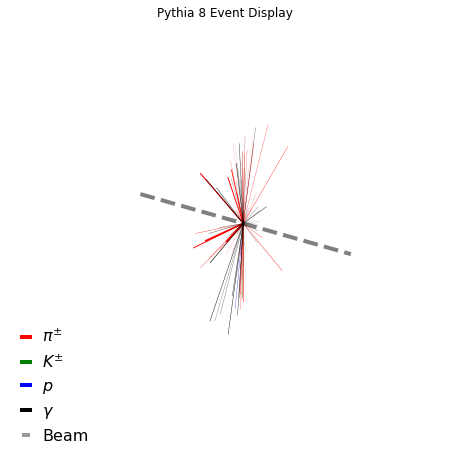

In [165]:
pythia.next() # generate the next event    
EventDisplay(pythia.event, magneticFeild=False, addDetector=False, view_angle=(30,30)) # plot the event

The particles are colored by their PDG ID. The colors are:
* Red - $\pi^\pm$
* Green - $K^\pm$
* Blue - $p^\pm$
* Black - $\gamma$ and other particles

You can see that the beam pipe is along the z axis. The particles are coming from the origin. In a vaccuum there is no magnetic feild and therefore no curvature. So the tracks are straight lines. Now lets add a detector.
```python

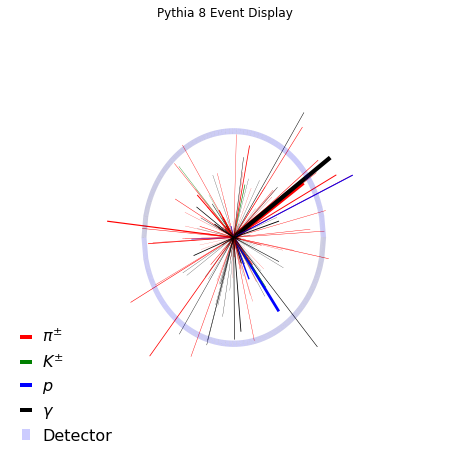

In [166]:
pythia.next() # generate the next event    
EventDisplay(pythia.event, magneticFeild=False, addDetector=True, view_angle=(90,90)) # plot the event

Notice the tracks are still straight. We can't measure a momentum without a magnetic field. So we can't measure the curvature of the tracks. We can only measure the energy of the particles. Lets add a magnetic field.
```python

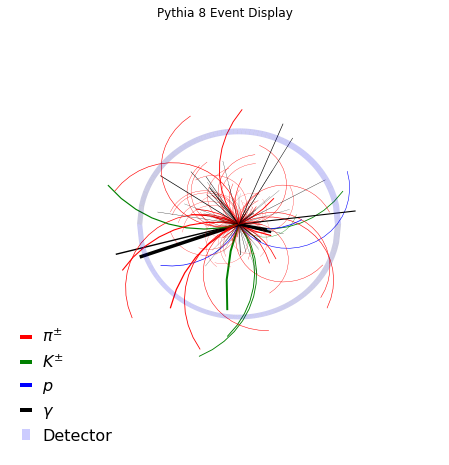

In [167]:
pythia.next() # generate the next event    
EventDisplay(pythia.event, magneticFeild=True, addDetector=True, view_angle=(90,90)) # plot the event

Now we need to measure the curvature of the tracks in the magnetic feild. We do this with scilicon tracking detectors. The tracking detectors are made of silicon strips. When a charged particle passes through the silicon it knocks electrons off the silicon. The electrons are collected by the silicon strips. The position of the particle can be determined by which strips collect electrons. The curvature of the track can be determined by the position of the strips. The curvature of the track is proportional to the momentum of the particle. Lets add the tracking detectors.
```python

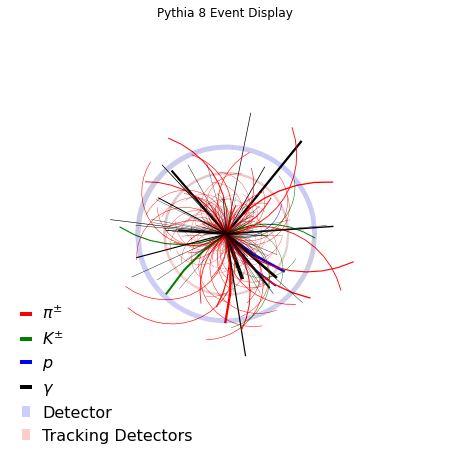

In [168]:
pythia.next() # generate the next event    
EventDisplay(pythia.event, magneticFeild=True, addDetector=True, addTracking=True, view_angle=(90,90)) # plot the event

Finally, we can measure momentum of our particles but we still can't measure the energy. To measure the energy we use calorimeters. Calorimeters are made of dense material. When a particle passes through the material it creates an electromagnetic shower. The energy of the particle is proportional to the size of the shower. The calorimeters are made of alternating layers of dense material and metal. The dense material creates the electromagnetic shower. The metal is used to absorb the shower. Lets add the calorimeters.
```python

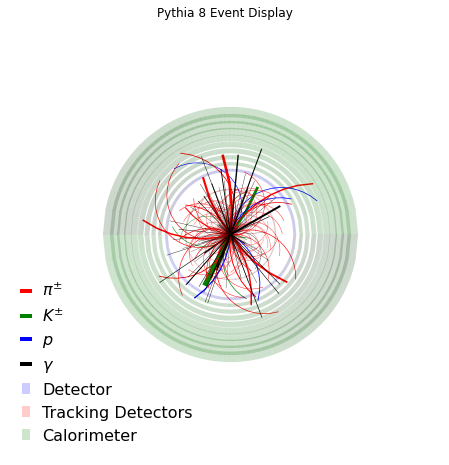

In [178]:
pythia.next() # generate the next event    
EventDisplay(pythia.event, magneticFeild=True, addDetector=True, addTracking=True, addCalo=True, view_angle=(90,90)) # plot the event

Now we can measure particle energy and momentum. However, the detectors we added are not going to see what pythia simulated. The tracking detectors will measure hits where particles pass through the silicon. The calorimeters will measure energy deposits where particles pass through the calorimeter. Lets see what we can expect to see in our detectors.
```python

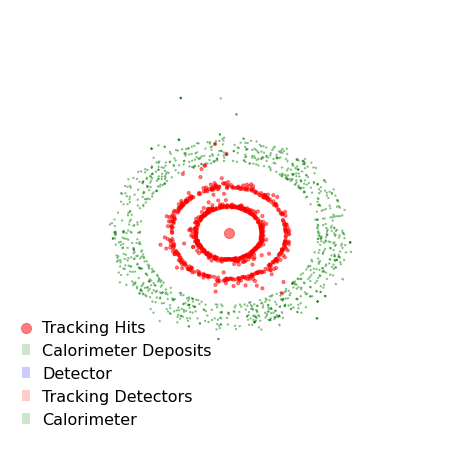

In [216]:
pythia.next() # generate the next event    
EventDisplay(pythia.event, magneticFeild=True, addDetector=True, addTracking=True, addCalo=True, measure=True, view_angle=(90,90)) # plot the event

Obvious this is alot different than what pythia simulated. This is because our detectors are not perfect. The tracking detectors have a finite resolution. This means that they can't measure the exact position of the particle. The calorimeters also have a finite resolution.
We typically correct for this inefficiencies by unfolding the data. This is a process that corrects for the finite resolution of our detectors. However, this is a complicated process and is beyond the scope of this tutorial. For more information see [here](https://arxiv.org/pdf/1201.4612.pdf).
